<a href="https://colab.research.google.com/github/nandinisnair/Network-Science/blob/main/epidemicspread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving out.moreno_oz_oz.docx to out.moreno_oz_oz (1).docx


In [ ]:
file_name = list(uploaded.keys())[0]
!pip install python-docx
import docx
doc = docx.Document(file_name)
edges = []
for paragraph in doc.paragraphs:
    try:
        line = paragraph.text
        if not line.startswith('%'):
            source, target, weight = line.strip().split()
            edges.append([int(source), int(target), float(weight)])
    except ValueError:
        pass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
G = nx.Graph()
for edge in edges:
    source, target, weight = edge
    G.add_edge(source, target, weight=weight)

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 217
Number of edges: 1839


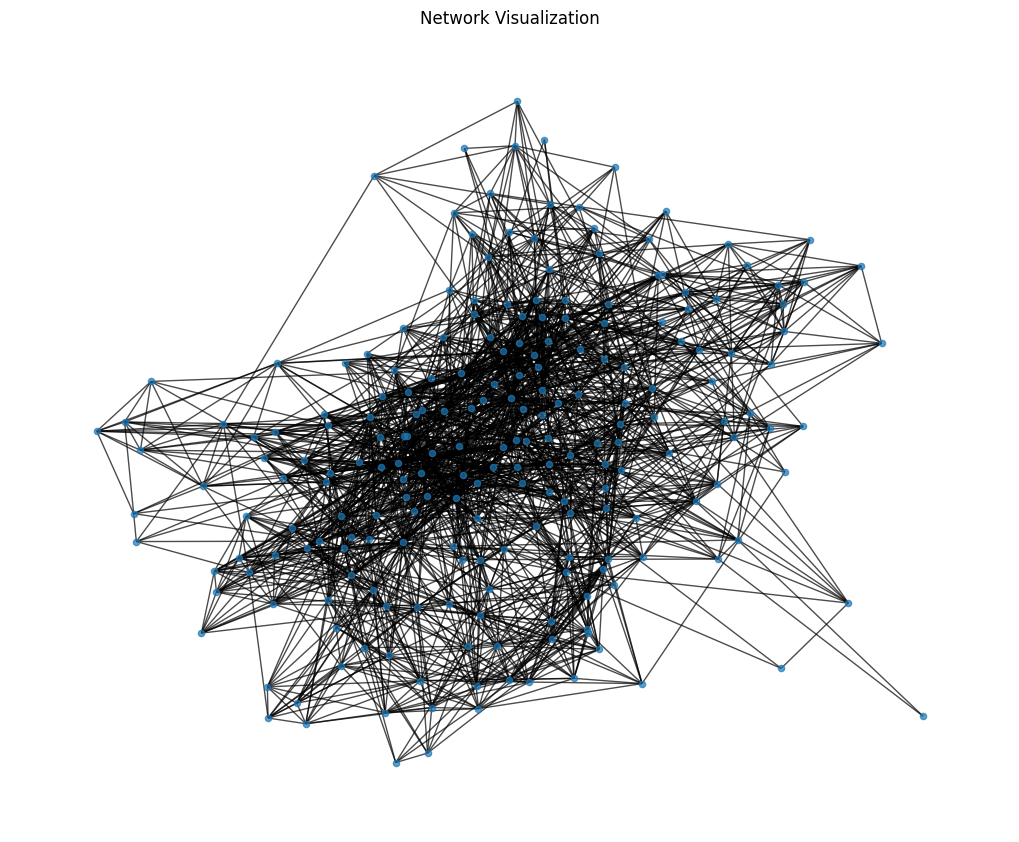

In [ ]:
# Visualize the network
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=20, alpha=0.7)
plt.title("Network Visualization")
plt.show()

In [ ]:
connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)
print(f"Number of connected components: {len(connected_components)}")
print(f"Size of the largest connected component: {len(largest_component)}")

Number of connected components: 1
Size of the largest connected component: 217


In [ ]:
G_largest = G.subgraph(largest_component)
avg_path_length = nx.average_shortest_path_length(G_largest)
diameter = nx.diameter(G_largest)
clustering_coefficient = nx.average_clustering(G)
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
assortativity = nx.degree_assortativity_coefficient(G)

In [ ]:
print(f"Average path length (largest component): {avg_path_length}")
print(f"Diameter (largest component): {diameter}")
print(f"Average clustering coefficient: {clustering_coefficient}")
print(f"Network density: {density}")
print(f"Average degree: {avg_degree}")
print(f"Degree assortativity coefficient: {assortativity}")

Average path length (largest component): 2.394649257552483
Diameter (largest component): 4
Average clustering coefficient: 0.3627511389901478
Network density: 0.07846902201740912
Average degree: 16.94930875576037
Degree assortativity coefficient: 0.09596250751874459


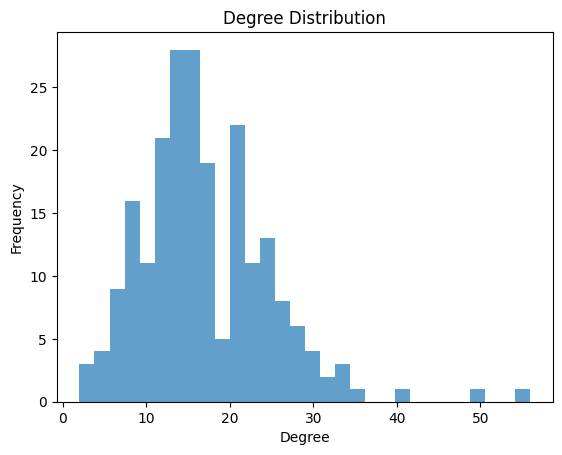

In [ ]:
# Degree distribution
degrees = [deg for _, deg in G.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
strength_centrality = {node: sum([d['weight'] for _, _, d in G.edges(node, data=True)]) for node in G.nodes()}
betweenness_centrality = nx.betweenness_centrality(G)
weighted_betweenness = nx.betweenness_centrality(G, weight='weight')

In [ ]:
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
sorted_strength = sorted(strength_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print("Top 5 nodes by degree centrality:", sorted_degree)
print("Top 5 nodes by strength centrality:", sorted_strength)
print("Top 5 nodes by betweenness centrality:", sorted_betweenness)
print("Top 5 nodes by weighted betweenness:", sorted_weighted_betweenness)

Top 5 nodes by degree centrality: [(70, 0.25925925925925924), (184, 0.23148148148148145), (169, 0.1898148148148148), (113, 0.16203703703703703), (120, 0.15740740740740738)]
Top 5 nodes by strength centrality: [(70, 152.0), (169, 136.0), (184, 135.0), (120, 111.0), (128, 111.0)]
Top 5 nodes by betweenness centrality: [(70, 0.06586755616874802), (184, 0.04897830468329907), (113, 0.04564484595777886), (98, 0.03158816404910712), (169, 0.02825048335655033)]
Top 5 nodes by weighted betweenness: [(97, 0.13669879336418003), (184, 0.13418253537884064), (70, 0.10930769737004624), (113, 0.10106924461928961), (98, 0.0561894863877115)]


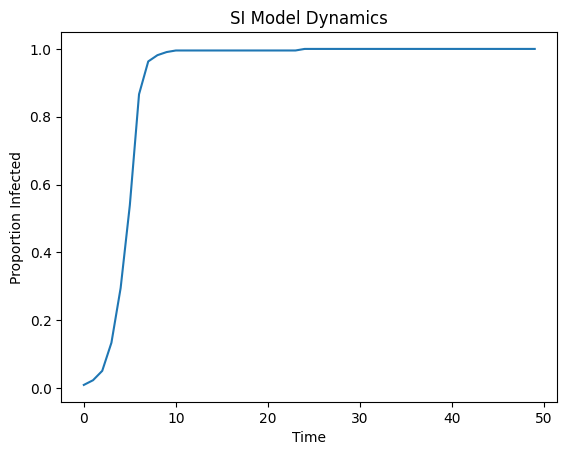

In [ ]:
# SI Model
def si_model(G, beta, timesteps, initial_infected_fraction=0.01):
    nodes = list(G.nodes())
    initial_infected = np.random.choice(nodes, int(len(nodes) * initial_infected_fraction), replace=False)
    status = {node: 'S' for node in nodes}
    for node in initial_infected:
        status[node] = 'I'

    results = []
    for t in range(timesteps):
        new_status = status.copy()
        for node in nodes:
            if status[node] == 'S':
                neighbors = G.neighbors(node)
                infected_neighbors = [n for n in neighbors if status[n] == 'I']
                if len(infected_neighbors) > 0:
                    if np.random.rand() < beta * len(infected_neighbors):
                        new_status[node] = 'I'
        status = new_status
        infected_count = list(status.values()).count('I')
        results.append(infected_count / len(nodes))
    return results
beta = 0.1
timesteps = 50
results_si = si_model(G, beta, timesteps)

plt.plot(results_si)
plt.xlabel('Time')
plt.ylabel('Proportion Infected')
plt.title('SI Model Dynamics')
plt.show()

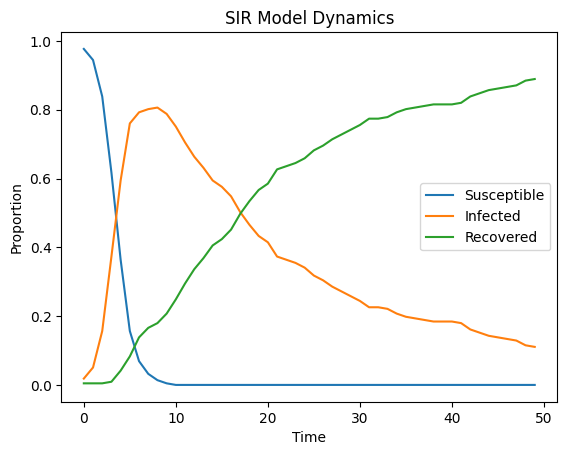

In [ ]:
# SIR Model
def sir_model(G, beta, gamma, timesteps, initial_infected_fraction=0.01):
    nodes = list(G.nodes())
    initial_infected = np.random.choice(nodes, int(len(nodes) * initial_infected_fraction), replace=False)
    status = {node: 'S' for node in nodes}
    for node in initial_infected:
        status[node] = 'I'

    results = {'S': [], 'I': [], 'R': []}
    for t in range(timesteps):
        new_status = status.copy()
        for node in nodes:
            if status[node] == 'S':
                neighbors = G.neighbors(node)
                infected_neighbors = [n for n in neighbors if status[n] == 'I']
                if len(infected_neighbors) > 0:
                    if np.random.rand() < beta * len(infected_neighbors):
                        new_status[node] = 'I'
            elif status[node] == 'I':
                if np.random.rand() < gamma:
                    new_status[node] = 'R'
        status = new_status
        results['S'].append(list(status.values()).count('S') / len(nodes))
        results['I'].append(list(status.values()).count('I') / len(nodes))
        results['R'].append(list(status.values()).count('R') / len(nodes))
    return results
gamma = 0.05
results_sir = sir_model(G, beta, gamma, timesteps)

plt.plot(results_sir['S'], label='Susceptible')
plt.plot(results_sir['I'], label='Infected')
plt.plot(results_sir['R'], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('SIR Model Dynamics')
plt.legend()
plt.show()

In [ ]:
# Random and Degree-Based Vaccination
import random
import networkx as nx

def vaccinate_random(G, fraction):
    num_nodes_to_vaccinate = int(fraction * G.number_of_nodes())
    nodes_to_vaccinate = random.sample(list(G.nodes()), num_nodes_to_vaccinate)
    G_vaccinated = G.copy()
    G_vaccinated.remove_nodes_from(nodes_to_vaccinate)
    return G_vaccinated

def vaccinate_by_degree(G, fraction):
    num_nodes_to_vaccinate = int(fraction * G.number_of_nodes())
    sorted_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)
    nodes_to_vaccinate = [node for node, degree in sorted_nodes[:num_nodes_to_vaccinate]]
    G_vaccinated = G.copy()
    G_vaccinated.remove_nodes_from(nodes_to_vaccinate)
    return G_vaccinated

fractions = [0.1, 0.25, 0.5, 0.75, 0.9]
for f in fractions:
    print(f"\n--- Fraction Vaccinated: {f} ---")
    G_random_vaccinated = vaccinate_random(G, f)
    G_degree_vaccinated = vaccinate_by_degree(G, f)
    results_random = sir_model(G_random_vaccinated, beta, gamma, timesteps)
    results_degree = sir_model(G_degree_vaccinated, beta, gamma, timesteps)
    print(f"Random Vaccination - Final S={results_random['S'][-1]:.2f}, I={results_random['I'][-1]:.2f}, R={results_random['R'][-1]:.2f}")
    print(f"Degree-Based Vaccination - Final S={results_degree['S'][-1]:.2f}, I={results_degree['I'][-1]:.2f}, R={results_degree['R'][-1]:.2f}")


--- Fraction Vaccinated: 0.1 ---
Random Vaccination - Final S=0.00, I=0.11, R=0.89
Degree-Based Vaccination - Final S=0.00, I=0.15, R=0.85

--- Fraction Vaccinated: 0.25 ---
Random Vaccination - Final S=0.01, I=0.13, R=0.86
Degree-Based Vaccination - Final S=0.00, I=0.21, R=0.79

--- Fraction Vaccinated: 0.5 ---
Random Vaccination - Final S=0.03, I=0.19, R=0.78
Degree-Based Vaccination - Final S=0.11, I=0.30, R=0.59

--- Fraction Vaccinated: 0.75 ---
Random Vaccination - Final S=1.00, I=0.00, R=0.00
Degree-Based Vaccination - Final S=1.00, I=0.00, R=0.00

--- Fraction Vaccinated: 0.9 ---
Random Vaccination - Final S=1.00, I=0.00, R=0.00
Degree-Based Vaccination - Final S=1.00, I=0.00, R=0.00
